# Music Trends Analysis by location

## 1. Overview
People in different parts of the world prefer to hear songs of different kinds, genres and duration. Spotify is one place where most of them fulfil their music cravings. In this notebook, we will perform a simple EDA of music trends around the globe. Here, we will be using <b>Spotify's Top Songs by Country Charts</b> dataset which was extracted by me using Selenium and BeautifulSoup and is available on Kaggle <a href="https://www.kaggle.com/hkapoor/spotify-top-songs-by-country-may-2020">here</a>. I also gave the charts a Spotify coloured theme.

## 2. About dataset
It contains "Top 50 songs" of 62 countries and one "Top 50 Global" chart.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv("Data/SpotifyTopSongsByCountry - May 2020.csv")

In [3]:
data_df.shape

(3150, 8)

### Features
- <b>Country</b> : Country name or "Global" 
- <b>Continent</b> : Continent name
- <b>Rank</b> : Song rank specific to country
- <b>Title</b> : Title of the song
- <b>Artists</b> : Artist(s) of the song
- <b>Album</b> : Album name
- <b>Explicit</b> : If the track is explicit?
- <b>Duration</b> : Duration of the track

In [4]:
data_df.head(5)

,Country,Continent,Rank,Title,Artists,Album,Explicit,Duration
0,Global,Global,1,Rain On Me (with Ariana Grande),"Lady Gaga, Ariana Grande",Rain On Me (with Ariana Grande),0,3:02
1,Global,Global,2,Blinding Lights,The Weeknd,After Hours,0,3:20
2,Global,Global,3,ROCKSTAR (feat. Roddy Ricch),"DaBaby, Roddy Ricch",BLAME IT ON BABY,1,3:01
3,Global,Global,4,Roses - Imanbek Remix,"SAINt JHN, Imanbek",Roses (Imanbek Remix),1,2:56
4,Global,Global,5,Toosie Slide,Drake,Dark Lane Demo Tapes,1,4:07


(Comment below if you are interested to know how I extracted the dataset and I will upload a notebook for the same)

## 3. Exploratory Data Analysis
Let's start our EDA by individually exploring each feature.

### Q1. Identify unique countires with Spotify

In [5]:
unique_countries = data_df["Country"].unique()
unique_countries = unique_countries[unique_countries != "Global"]
unique_countries

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mexico',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Singapore', 'Slovakia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'United Kingdom',
       'United States', 'Uruguay', 'Vietnam'], dtype=object)

We have 62 unique countries in our dataset. Let's plot a map to locate these countries. To do so we will need longitudnal and latitudnal values of each country for which we will use geopy library.

In [7]:
from geopy.geocoders import Nominatim

latitude = []
longitude = []
geolocator = Nominatim(user_agent="my-app")

for i in unique_countries:
    location = geolocator.geocode(i)
    latitude.append(location.latitude)
    longitude.append(location.longitude)

In [9]:
# reference - https://python-graph-gallery.com/313-bubble-map-with-folium/

import folium
 
data = pd.DataFrame({
   'lat':latitude,
   'lon':longitude,
   'name':unique_countries,
    'value':[20.0]*62
})
 
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)
 
    
for i in range(0,len(data)):
    folium.Circle(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['name'],
      radius=data.iloc[i]['value']*10000,
      color='#1db954',
      fill=True,
      fill_color='#1db954'
   ).add_to(m)
    
m

Before performing analysis, its important to know from where our data comes from. It looks like most countries are from Europe, lets look at Continents feature to confirm this.

### Q2. Identify unique continents with Spotify

In [10]:
data_df["Continent"].unique()

array(['Global', 'South America', 'Australia', 'Europe', 'North America',
       'Asia', 'Africa'], dtype=object)

Number of countries in each continent

In [11]:
continent_value_counts = (data_df["Continent"].value_counts()/50).astype("int32")
continent_value_counts = continent_value_counts.drop("Global")

In [12]:
continent_value_counts

Europe           29
Asia             11
North America    10
South America     9
Australia         2
Africa            1
Name: Continent, dtype: int32

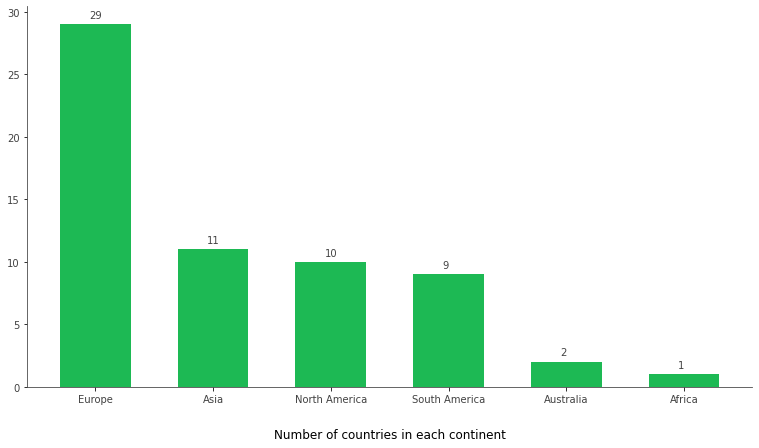

In [13]:
height = continent_value_counts.values
bars = continent_value_counts.index
y_pos = range(0,12,2)

fig = plt.figure(figsize=[13,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.bar(y_pos, height, color="#1db954", width=1.2)
 
plt.xticks(y_pos, bars, color="#424242")
plt.yticks(color="#424242")
for i, v in enumerate(height):
    ax.text((i)*2 - 0.1, v+0.5, str(v), color='#424242')
plt.title("Number of countries in each continent", y=-0.15)

plt.show()

We have majourity of our data from Europian countries.

### Q3. Identify the Top10 tracks

In [14]:
top10_tracks = data_df["Title"].value_counts()[:10].sort_values(ascending=True)

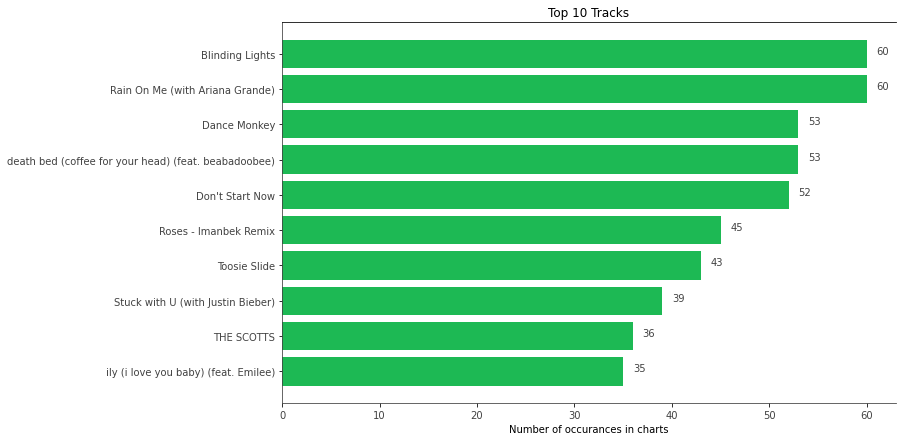

In [15]:
height = top10_tracks.values
bars = top10_tracks.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.barh(y_pos, height, color="#1db954", height=0.8)
 
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of occurances in charts")

for i, v in enumerate(height):
    ax.text(v+1, i, str(v), color='#424242')
plt.title("Top 10 Tracks")


plt.show()

2 songs made it to 60 charts out of 63, that's something!

### Q4. Identify Top10 Artists

Preprocessing the Artists columns because some tracks have multiple artists.

In [16]:
Artists = []
for i in data_df["Artists"]:
    a = i.split(", ")
    Artists = Artists + a

Number of total individual artist occurances in all songs.

In [17]:
len(Artists)

5056

In [18]:
top10_artists = pd.Series(Artists).value_counts()[:10].sort_values(ascending=True)

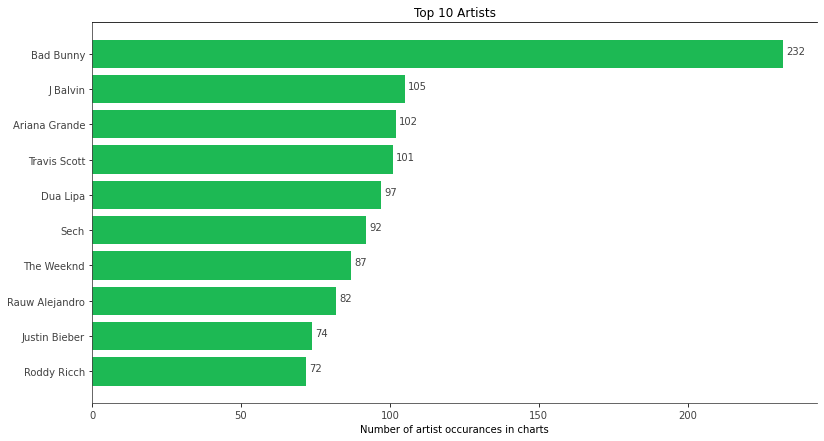

In [19]:
height = top10_artists.values
bars = top10_artists.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[13,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.barh(y_pos, height, color="#1db954", height=0.8)
 
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of artist occurances in charts")

for i, v in enumerate(height):
    ax.text(v+1, i, str(v), color='#424242')
plt.title("Top 10 Artists")


plt.show()

"Bad Bunny" outweighs all other artists by a huge margin! Ironically, none of his track made it to Top 10 most occuring tracks.

### Q5. Identify Top10 albums

In [20]:
top10_albums = data_df["Album"].value_counts()[:10].sort_values(ascending=True)

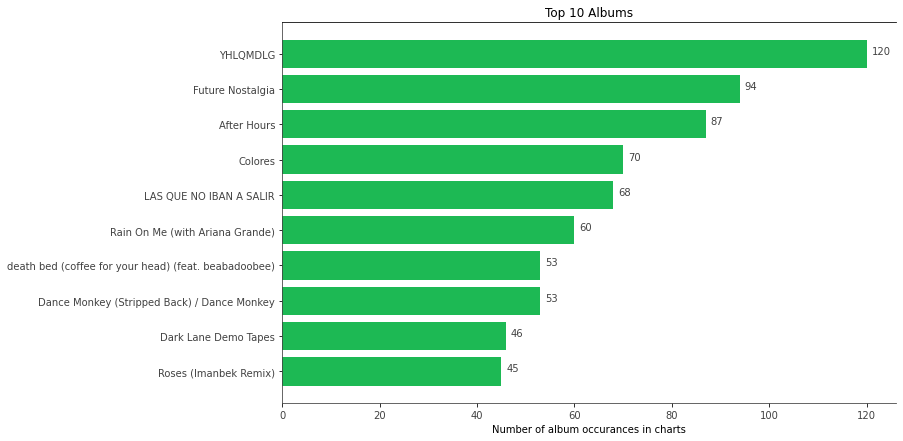

In [21]:
height = top10_albums.values
bars = top10_albums.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.barh(y_pos, height, color="#1db954", height=0.8)
 
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of album occurances in charts")

for i, v in enumerate(height):
    ax.text(v+1, i, str(v), color='#424242')
plt.title("Top 10 Albums")

plt.show()

Again, "Bad Bunny" wins this one.

### Q6. What is the distribution of song durations?

In [22]:
seconds = []
for i in data_df["Duration"]:
    val = i.split(":")
    secs = int(val[0])*60 + int(val[1])
    seconds.append(secs)

C:\Users\hk25439\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


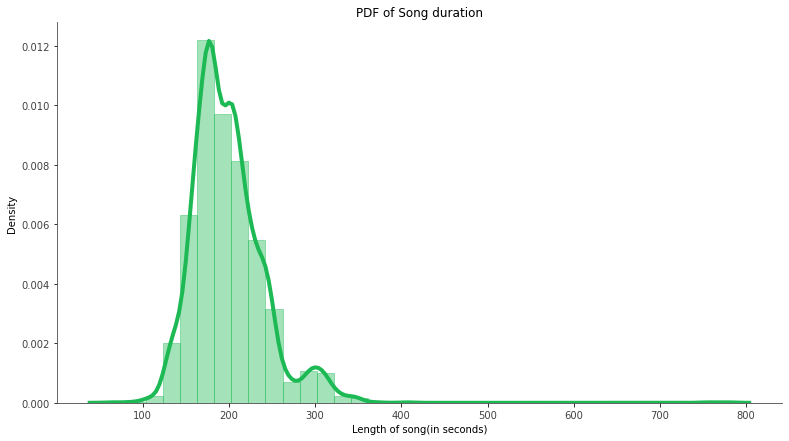

In [23]:
fig = plt.figure(figsize=[13,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

sns.distplot(seconds, hist=True, kde=True, bins=int(180/5), color = '#1db954',  hist_kws={'edgecolor':'#1db954'},
             kde_kws={'linewidth': 4})
 
plt.xticks(color="#424242")
plt.yticks(color="#424242")
plt.xlabel("Length of song(in seconds)")
plt.title("PDF of Song duration")

plt.show()

Most songs lies in the 3min to 3min 20 seconds range. Interestingly, there is another small spike close to 5 min mark. Let's explore!

In [24]:
data_df["duration_in_s"] = seconds
duration_by_c = data_df.groupby("Country").mean()["duration_in_s"]

Here, we will examine countries with lowest song duration averages

In [25]:
bottom5_duration = duration_by_c.sort_values()[:5]
bottom5_duration

Country
Germany    176.56
Sweden     179.50
Brazil     181.80
Austria    182.10
Denmark    184.22
Name: duration_in_s, dtype: float64

3 of them are from Europe, 1 from South America and 1 from Australia. Needless to stay it is pretty scattered to make a conclusion. Let's look at countries with highest song duration averages.

In [26]:
top5_duration = duration_by_c.sort_values(ascending=False)[:5]
top5_duration

Country
Japan        264.10
Indonesia    236.54
Thailand     223.00
Taiwan       220.66
India        217.16
Name: duration_in_s, dtype: float64

Wow! All 5 countries are Asian. Remember, we only had 11 Asian countries in our database. Let's create BoxPlots of are selected top and bottom 5 countries.

In [27]:
filtered_data1 = data_df[(data_df["Country"].isin(list(top5_duration.index))) + (data_df["Country"].isin(list(bottom5_duration.index)))]


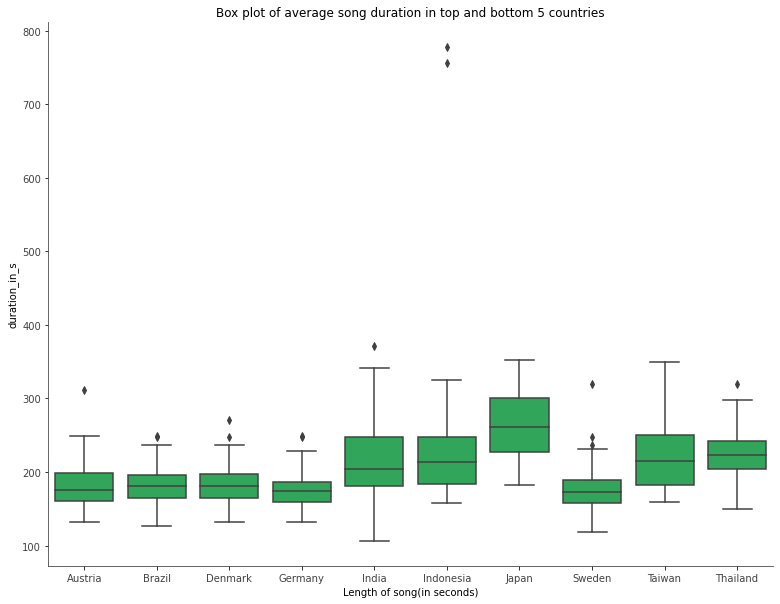

In [28]:
fig = plt.figure(figsize=[13,10], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

sns.boxplot( x = filtered_data1["Country"], y = filtered_data1["duration_in_s"], color = '#1db954')
 
plt.xticks(color="#424242")
plt.yticks(color="#424242")
plt.xlabel("Length of song(in seconds)")
plt.title("Box plot of average song duration in top and bottom 5 countries")

plt.show()

Well, one reason Indonesia is 2nd on the list might be because of 2 extremely long songs. But, overall songs liked by Asians are longer in duration. Let's check this on the whole dataset.

In [29]:
filtered_data2 = data_df[data_df["Continent"] != "Global"]

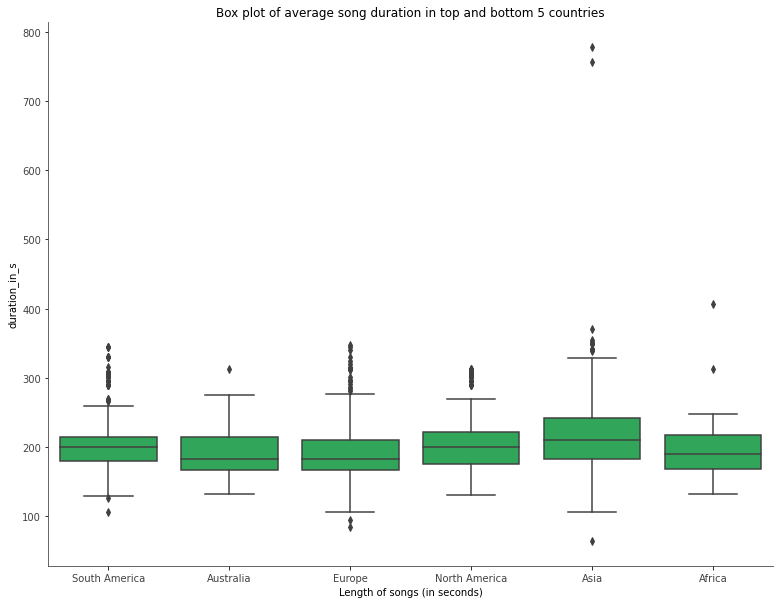

In [30]:
fig = plt.figure(figsize=[13,10], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

sns.boxplot( x = filtered_data2["Continent"], y = filtered_data2["duration_in_s"], color = '#1db954')
 
plt.xticks(color="#424242")
plt.yticks(color="#424242")
plt.xlabel("Length of songs (in seconds)")
plt.title("Box plot of average song duration in top and bottom 5 countries")

plt.show()

As we can see, songs preferred by Asians are of longer durations while songs liked in Europian countries are mostly around the 3minute mark.

### Q7. Number of Explicit tracks on Spotify

In [31]:
exp_data = data_df["Explicit"].value_counts().sort_values()
exp_data

1    1099
0    2051
Name: Explicit, dtype: int64

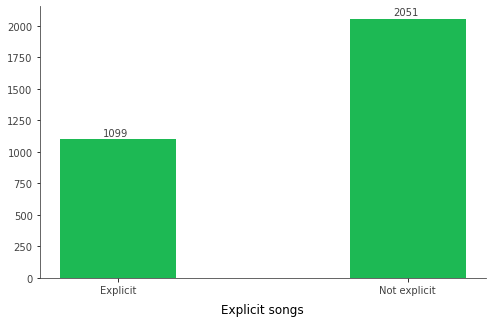

In [32]:
height = exp_data.values
bars = ["Explicit", "Not explicit"]
y_pos = range(0,4,2)

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.bar(y_pos, height, color="#1db954", width=0.8)
 
plt.xticks(y_pos, bars, color="#424242")
plt.yticks(color="#424242")
for i, v in enumerate(height):
    ax.text((i)*2 - 0.1, v+30, str(v), color='#424242')
plt.title("Explicit songs", y=-0.15)

plt.show()

Around 35% of the songs liked by people are Explicit. Let's see how it varies by location.

In [33]:
exp_data_cont = data_df.groupby("Continent").mean()["Explicit"]
exp_data_cont

Continent
Africa           0.460000
Asia             0.185455
Australia        0.440000
Europe           0.404138
Global           0.460000
North America    0.394000
South America    0.275556
Name: Explicit, dtype: float64

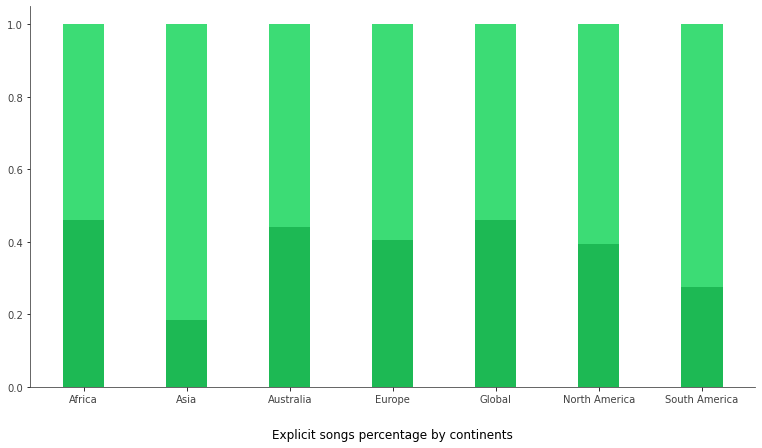

In [34]:
height = exp_data_cont.values
bars = exp_data_cont.index
y_pos = range(0,14,2)

fig = plt.figure(figsize=[13,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.bar(y_pos, height, color="#1db954", width=0.8)
plt.bar(y_pos, 1 - height, bottom = height,color="#3CDC75", width=0.8)
 
plt.xticks(y_pos, bars, color="#424242")
plt.yticks(color="#424242")
'''
for i, v in enumerate(height):
    ax.text((i)*2 - 0.2, v+0.01, str(np.round(v,2)), color='#424242')
'''
plt.title("Explicit songs percentage by continents", y=-0.15)

plt.show()

Turns out Asian countries don't prefer Explicit songs (18% approx.) as compared to other countries. Also, "Global Top 50 Chart" has 23 explicit songs. 

## 4. Conclusions

1. Dataset is imbalanced with more Europian countries.
2. Few songs have managed to make in 96% of Top Charts of all countries.
3. Even though few artists have many occurances in the Top charts, they don't have any song in Top 10 tracks occurances.
4. Average song duration preferred by most is around 3:00 minutes to 3:20 minutes
5. People in Asian countries prefer longer song duration. Europian countries mostly listen to songs close to or less than 3 minutes.
6. Asian countries prefer less of explicit songs, only 18%, compared to world average of 35%. "Global Top 50 Chart" has 23 explicit songs.